In [2]:
import pandas as pd
import numpy as np
from time import time

In [2]:
from pandas.io import gbq

In [11]:
def read(query):
    df = gbq.read_gbq(query, project_id='zoomcamp-380308')
    return df

In [53]:
# View top 5 rows
read('''SELECT * 
        FROM `zoomcamp-380308.carbon.emissions` limit 5
        ''')

,ID,Country,Vehicle_Family_ID,Pool,Manufacturer_EU,Manufacturer_OEM,Manufacturer_MS,TA_number,Type,Variant,...,Emission_reduction_IT,Emission_reduction_NEDC,Emission_reduction_WLTP,Deviation_factor,Verification_factor,Type_of_data,Registration_year,Registration_date,Fuel_consumption,Electric_range
0,57566673,IS,IP-01-JMB-2018-0001,RENAULT-NISSAN-MITSUBISHI,MITSUBISHI MOTORS CORPORATION,MITSUBISHI MOTORS CORPORATION,NaN,E1*2001/116*0406*32,CW0,GGP21,...,None,NaN,NaN,NaN,NaN,P,2021,2021-03-24 00:00:00+00:00,NaN,45.0
1,57566674,IS,IP-01-JMB-2018-0001,RENAULT-NISSAN-MITSUBISHI,MITSUBISHI MOTORS CORPORATION,MITSUBISHI MOTORS CORPORATION,NaN,E1*2001/116*0406*32,CW0,GGP21,...,None,NaN,NaN,NaN,NaN,P,2021,2021-03-24 00:00:00+00:00,NaN,45.0
2,57566675,IS,IP-01-JMB-2018-0001,RENAULT-NISSAN-MITSUBISHI,MITSUBISHI MOTORS CORPORATION,MITSUBISHI MOTORS CORPORATION,NaN,E1*2001/116*0406*32,CW0,GGP21,...,None,NaN,NaN,NaN,NaN,P,2021,2021-03-23 00:00:00+00:00,NaN,45.0
3,57566676,IS,IP-01-JMB-2018-0001,RENAULT-NISSAN-MITSUBISHI,MITSUBISHI MOTORS CORPORATION,MITSUBISHI MOTORS CORPORATION,NaN,E1*2001/116*0406*32,CW0,GGP21,...,None,NaN,NaN,NaN,NaN,P,2021,2021-03-23 00:00:00+00:00,NaN,45.0
4,57566677,IS,IP-01-JMB-2018-0001,RENAULT-NISSAN-MITSUBISHI,MITSUBISHI MOTORS CORPORATION,MITSUBISHI MOTORS CORPORATION,NaN,E1*2001/116*0406*32,CW0,GGP21,...,None,NaN,NaN,NaN,NaN,P,2021,2021-03-19 00:00:00+00:00,NaN,45.0


In [54]:
# View columns using sql and pandas
read('''SELECT * 
        FROM `zoomcamp-380308.carbon.emissions` limit 1
        ''').columns

Index(['ID', 'Country', 'Vehicle_Family_ID', 'Pool', 'Manufacturer_EU',
       'Manufacturer_OEM', 'Manufacturer_MS', 'TA_number', 'Type', 'Variant',
       'Version', 'Make', 'Commercial_Name', 'Category_A', 'Category_R',
       'Total_registrations', 'Mass_RO', 'WLTP_test_mass', 'Emissions_NEDC',
       'Emissions_WLTP', 'Wheel_base', 'Axle_width_steering',
       'Axle_width_other', 'Fuel_type', 'Fuel_mode', 'Engine_capacity',
       'Engine_power', 'Electricity_consumption', 'Emission_reduction_IT',
       'Emission_reduction_NEDC', 'Emission_reduction_WLTP',
       'Deviation_factor', 'Verification_factor', 'Type_of_data',
       'Registration_year', 'Registration_date', 'Fuel_consumption',
       'Electric_range'],
      dtype='object')

In [55]:
# Total cars registered
read('''SELECT COUNT(*) cars_registered          
        FROM `zoomcamp-380308.carbon.emissions_clustered`
        ''')

,cars_registered
0,9920108


In [47]:
# Average Emissions_WLTP,Engine_power,Engine_capacity,Mass_RO
read('''SELECT CAST(AVG(Emissions_WLTP) AS INT) AS AVG_Emissions_WLTP,
                CAST(AVG(Engine_power) as INT) As AVG_Engine_power,
                CAST(AVG(Engine_capacity) as INT) As AVG_Engine_capacity,
                CAST(AVG(Mass_RO) as INT) As Mass_RO                
        FROM `zoomcamp-380308.carbon.emissions_clustered`
        ''')

,AVG_Emissions_WLTP,AVG_Engine_power,AVG_Engine_capacity,Mass_RO
0,115,103,1527,1490


Only did this since am using bigquery compute

<AxesSubplot:xlabel='Fuel_type'>

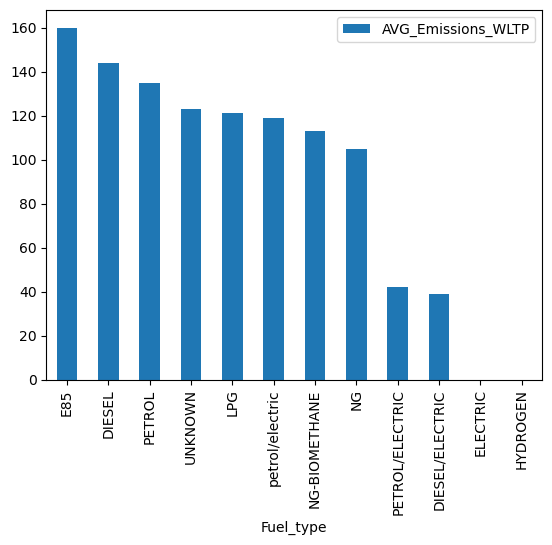

In [52]:
#Average emissions by Fuel_type ((gCO2/km))
read('''
    SELECT Fuel_type, CAST(AVG(Emissions_WLTP) AS INT) AS AVG_Emissions_WLTP
    FROM `zoomcamp-380308.carbon.emissions_clustered`
    GROUP BY Fuel_type
    ORDER BY AVG_Emissions_WLTP DESC
        ''').set_index('Fuel_type').plot(kind='bar')

In [27]:
#Average emissions by country ((gCO2/km))
read('''
        SELECT c.Country_name, CAST(AVG(Emissions_WLTP) AS INT) AS AVG_Emissions_WLTP
        FROM `zoomcamp-380308.carbon.emissions_clustered` e
        INNER JOIN `zoomcamp-380308.carbon.codes` c ON c.Country_code = e.Country
        GROUP BY c.Country_name
        ORDER BY AVG_Emissions_WLTP DESC
        ''')

,Country_name,AVG_Emissions_WLTP
0,Cyprus,146
1,Latvia,143
2,Estonia,143
3,Bulgaria,140
4,Slovakia,139
5,Lithuania,136
6,Czechia,136
7,Poland,136
8,Slovenia,134
9,Hungary,133


In [26]:
#Vehicle registrations by Fuel Type
read('''
        SELECT Fuel_type, CAST(COUNT(*) AS INT) AS Vehicle_registrations
        FROM `zoomcamp-380308.carbon.emissions_clustered` 
        GROUP BY Fuel_type
        ORDER BY Vehicle_registrations DESC
        ''')

,Fuel_type,Vehicle_registrations
0,PETROL,5504147
1,DIESEL,2240862
2,ELECTRIC,998170
3,PETROL/ELECTRIC,841787
4,LPG,223292
5,DIESEL/ELECTRIC,55451
6,NG,39158
7,NG-BIOMETHANE,7631
8,E85,7237
9,UNKNOWN,1804


In [56]:
#Average Emissions (gC02/km) by country and Fuel Engine power
read('''
        SELECT c.Country_name, 
                CAST(AVG(Engine_power) AS INT) AS AVG_Engine_power,
                CAST(AVG(Emissions_WLTP) AS int) AS AVG_Emissions_WLTP
        FROM `zoomcamp-380308.carbon.emissions_clustered` e
        INNER JOIN `zoomcamp-380308.carbon.codes` c ON c.Country_code = e.Country
        GROUP BY c.Country_name
        ORDER BY AVG_Engine_power DESC,AVG_Emissions_WLTP DESC
        ''')

,Country_name,AVG_Engine_power,AVG_Emissions_WLTP
0,Norway,156,28
1,Iceland,142,80
2,Sweden,136,89
3,Luxembourg,124,124
4,Germany,116,114
5,Estonia,115,143
6,Bulgaria,114,140
7,Latvia,113,143
8,Denmark,111,93
9,Cyprus,109,146


In [30]:
#Average emissions ((gCO2/km)) by Manufacturer 
read('''
        SELECT Manufacturer_EU, CAST(AVG(Emissions_WLTP) AS INT) AS AVG_Emissions_WLTP
        FROM `zoomcamp-380308.carbon.emissions_clustered`
        GROUP BY Manufacturer_EU
        ORDER BY AVG_Emissions_WLTP DESC
        ''')

,Manufacturer_EU,AVG_Emissions_WLTP
0,BUGATTI,523
1,KOENIGSEGG,381
2,ROLLS ROYCE,365
3,PAGANI,361
4,LAMBORGHINI,350
...,...,...
92,UNKNOWN,0
93,ZOYTE,0
94,HUNAN JIANGNAN,<NA>
95,GREAT WALL MOTOR,<NA>


In [9]:
#%load_ext sql_magic
#%config SQL.conn_name = 'engine'